In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
from glob import glob

# core nltk
import nltk
from nltk.tokenize import word_tokenize

# gensim magic
import gensim
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
# load saved models
eebo_models = list()

# henry_VII 1510 - 1547
# edward_VI 1548 - 1553
# mary_I 1554 - 1558
# elizabeth_I 1559 - 1603
# james_I - 1604 - 1625
# charles_I - 1626 - 1649

input_data = ["../models/eebo-henry_VII.w2v",
              "../models/eebo-edward_VI.w2v",
              "../models/eebo-mary_I.w2v",
              "../models/eebo-elizabeth_I.w2v",
              "../models/eebo-james_I.w2v",
              "../models/eebo-charles_I.w2v"]

for fp in input_data:
    
    model_name = os.path.basename(fp).split(".")[0]
    print("starting: {0}".format(model_name))

    eebo_models.append([model_name,KeyedVectors.load(fp,mmap='r')])

starting: eebo-henry_VII
starting: eebo-edward_VI
starting: eebo-mary_I
starting: eebo-elizabeth_I
starting: eebo-james_I
starting: eebo-charles_I


In [14]:
# select two terms
terms=["predestination","church"]

labels=[x[0] for x in eebo_models]
d = list()
for i,model in enumerate(labels):
    d.append(eebo_models[i][1].distance(terms[0],terms[1]))

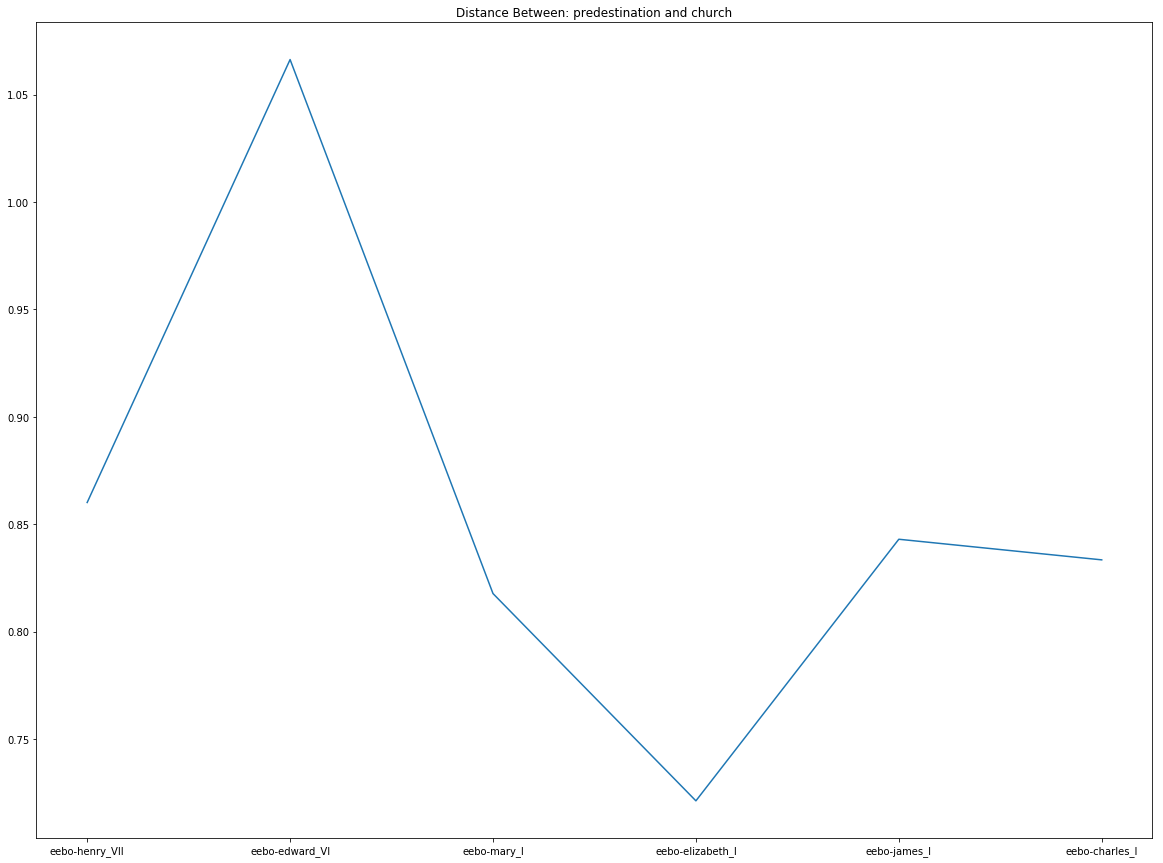

In [16]:
fig = plt.figure(figsize=(20, 15))
y = np.arange(len(d))
plt.plot(y,d)
plt.xticks(np.arange(len(labels)),labels)
plt.title("Distance Between: {0} and {1}".format(terms[0],terms[1]))
plt.show()